In [131]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

In [133]:
data = pd.read_csv('admission-results.csv')
data.head()

,Exam 1,Exam 2,Admitted
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [135]:
stats = data.describe()
stats

,Exam 1,Exam 2,Admitted
count,100.000000,100.000000,100.000000
mean,65.644274,66.221998,0.600000
std,19.458222,18.582783,0.492366
min,30.058822,30.603263,0.000000
25%,50.919511,48.179205,0.000000
50%,67.032988,67.682381,1.000000
75%,80.212529,79.360605,1.000000
max,99.827858,98.869436,1.000000


When doing manual gradient descent, it's advised to feature scale our X (even if they're all in the scale of 30-100).  Otherwise, the algorithm will converge slowly, requiring an $ \alpha $ of about 0.001, and around 3 million iterations.  It's slower than gradient descent for linear regression that runs at $ O(mn^2) $, since it needs to compute $ X\theta $ within a bunch of extras like sigmoid, etc.

It won't converge with bigger $ \alpha $ values like 0.01.

There are tons of optimizations that can be done, like avoiding the recomputation of $ g(X\theta) $ since it occurs in both the cost function and the gradient (partial derivative).  But feature scaling will speed up gradient descent dramatically, needing only around 400 iterations with an $ \alpha $ of 1.

![slow](slow.png)
![slower](slower.png)

In [137]:
X = data[['Exam 1', 'Exam 2']]
X[0: 10]
mean = X.mean().to_numpy()
std = X.std().to_numpy()

mean, std

(array([65.64427406, 66.22199809]), array([19.45822228, 18.58278304]))

Exam 1      19.458222
Exam 2      18.582783
Admitted     0.492366
dtype: float64 Exam 1      65.644274
Exam 2      66.221998
Admitted     0.600000
dtype: float64
### % of people within 1σ (64, 3)
### % of people within 2σ (100, 3)
### % of people within 3σ (100, 3)
### % of people within 1σ (51, 3)
### % of people within 2σ (100, 3)
### % of people within 3σ (100, 3)


,Admitted,Exam 1,Exam 2
0,NaN,-3.55637,-3.766298
1,NaN,-3.55637,-3.766298
2,NaN,-3.55637,-3.766298
3,NaN,-3.55637,-3.766298
4,NaN,-3.55637,-3.766298
5,NaN,-3.55637,-3.766298
6,NaN,-3.55637,-3.766298
7,NaN,-3.55637,-3.766298
8,NaN,-3.55637,-3.766298
9,NaN,-3.55637,-3.766298


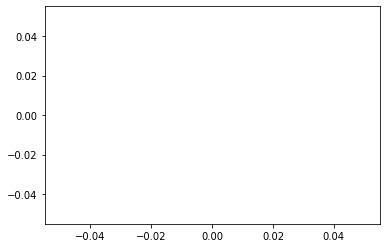

In [188]:
import seaborn as sbn
plt.plot()

print(std := data.std(), mean := data.mean())
t = data[data['Exam 1'].between(mean['Exam 1'] - std['Exam 1'], mean['Exam 1'] + std['Exam 1'])]
print('### % of people within 1σ', t.shape)
t = data[data['Exam 1'].between(mean['Exam 1'] - 2*std['Exam 1'], mean['Exam 1'] + 2*std['Exam 1'])]
print('### % of people within 2σ', t.shape)
t = data[data['Exam 1'].between(mean['Exam 1'] - 3*std['Exam 1'], mean['Exam 1'] + 3*std['Exam 1'])]
print('### % of people within 3σ', t.shape)

t = data[data['Exam 2'].between(mean['Exam 2'] - std['Exam 2'], mean['Exam 2'])]
print('### % of people -1σ to left of mean', t.shape)
t = data[data['Exam 2'].between(mean['Exam 2'] - 2*std['Exam 2'], mean['Exam 2'] - 1*std['Exam 2'])]
print('### % of people -2σ to -1σ', t.shape)
t = data[data['Exam 2'].between(mean['Exam 2'] - 3*std['Exam 2'], mean['Exam 2'] - 2*std['Exam 2'])]
print('### % of people -3σ to -2σ', t.shape)

t = data[data['Exam 2'].between(mean['Exam 2'], mean['Exam 2'] + std['Exam 2'])]
print('### % of people mean to +1σ', t.shape)
t = data[data['Exam 2'].between(mean['Exam 2'] + std['Exam 2'], mean['Exam 2'] + 2*std['Exam 2'])]
print('### % of people +1σ to +2σ', t.shape)
t = data[data['Exam 2'].between(mean['Exam 2'] + 2*std['Exam 2'], mean['Exam 2'] + 3*std['Exam 2'])]
print('### % of people +2σ to +3σ', t.shape)


def feature_scale(X):
    return (X - mean) / std

X = feature_scale(X)
X[0:10]

((60, 3),
       Exam 1     Exam 2  Admitted
 3  60.182599  86.308552         1
 4  79.032736  75.344376         1
 6  61.106665  96.511426         1
 7  75.024746  46.554014         1
 8  76.098787  87.420570         1)

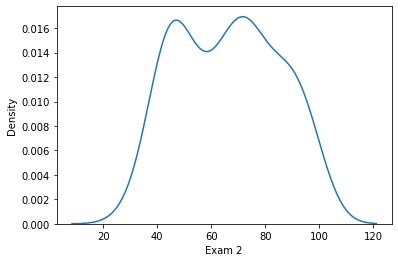

In [141]:
sbn.kdeplot(data['Exam 2'])

positive = data[data['Admitted'] == 1]
positive.shape, positive[0: 5]

In [143]:
negative = data[data['Admitted'] == 0]
negative.shape, negative[0: 5]

((40, 3),
        Exam 1     Exam 2  Admitted
 0   34.623660  78.024693         0
 1   30.286711  43.894998         0
 2   35.847409  72.902198         0
 5   45.083277  56.316372         0
 10  95.861555  38.225278         0)

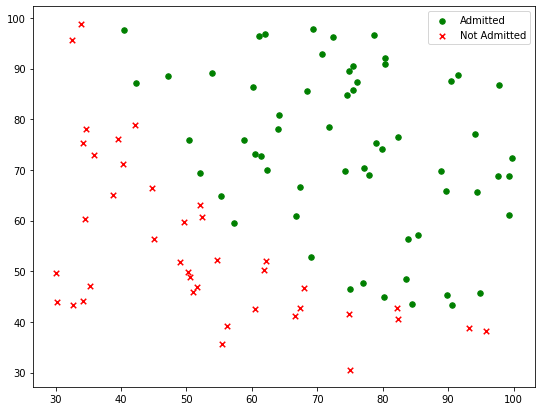

In [145]:
def plot_data():
    x1 = positive['Exam 1']
    x2 = positive['Exam 2']
    plt.figure(figsize=(9, 7))
    plt.scatter(x1, x2, color='green', marker='o', s=30, label='Admitted')

    x1 = negative['Exam 1']
    x2 = negative['Exam 2']
    plt.scatter(x1, x2, color='red', marker='x', s=30, label='Not Admitted')

    plt.legend()

plot_data()

In [147]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [149]:
np.round(
    sigmoid(np.array([[-5.5], 
                      [0], 
                      [5.5]])), 
    4)

array([[0.0041],
       [0.5   ],
       [0.9959]])

The vectorized formulas for the cost of logistic regression are:

#### Unregularized

let $ h $ be the result of $ g(X\theta) $, where $g$ is the sigmoid function.  We'll not use the Greek letter sigma ($ \sigma $) here since that's the letter for standard deviation.

$$ g(z) = \frac{1}{1 + e^{-z}} $$

$ z $ in most cases will be $ X\theta $, so the complete calculation for $ h $ will be:

$$ h = \frac{1}{1 + e^{-X\theta}} $$

And $ h $ will be an $m \times 1 $ vector, let's see why:

If we have 5 training data with two features ($ n = 2 $), we'll have these $ X $ and $\theta$

$$
X = \begin{bmatrix}
X_0^{(1)} & X_1^{(1)} & X_2^{(1)} \\
X_0^{(2)} & X_1^{(2)} & X_2^{(2)} \\
X_0^{(3)} & X_1^{(3)} & X_2^{(3)} \\
X_0^{(4)} & X_1^{(4)} & X_2^{(4)} \\
X_0^{(5)} & X_1^{(5)} & X_2^{(5)}
\end{bmatrix}, \theta = \begin{bmatrix}
\theta_0 \\
\theta_1 \\
\theta_2 \\
\end{bmatrix}
$$

$ X $ is a $ 5 \times 3 $ matrix multiplied by $ \theta $ that is a $ 3 \times 1 $ matrix results in a $ 5 \times 1 $ vector

$ J(\theta) = \frac{1}{m} [-y^Tlog(h) - (1 - y)^T log(1 - h) ] $

In this case, $ y $ and $ h $ are $ m \times 1 $ vectors, and we get their dot product (e.g. $ u^Tv $), which will replace the summation of the unvectorized cost function formula.

#### Regularized

$ J(\theta) =  -\frac{1}{m} [y^Tlog(h) + (1 - y)^T log(1 - h) ] + \frac{\lambda}{2m}(\theta^T\theta - \theta_0^2) $

We subtract the square of $ \theta_0 $ since the summation starts from $ j = 1 $, but $ j $ starts at 0, meaning $ \theta_0 $ is not regularized.

Another way to vectorize is to use Numpy's sum function `np.sum`, which mirrors more the summation notation.

```python3
theta = np.array([[41],
                  [33],
                  [10]])

theta.T @ theta - theta[0] ** 2
# array([[1189]])

np.sum(theta[1:] ** 2)
# 1189
```

Pay attention that the cost function is multiplied by $ \frac{1}{m} $ only, but the regularizer term is multiplied by $ \frac{1}{2m} $ **for convenience ** since the $ \frac{1}{2} $ cancels nicely with the $ 2 $ from the derivative of $ \theta_j^2 $.

<img src="notes.png" alt="formula from slides" style="width: 50%; height: 50%">

In [151]:
def cost(theta_maybe_1d, X, y, **kwargs):
    m = X.shape[0]
    regularizer = 0

    theta = theta_maybe_1d
    
    if theta_maybe_1d.ndim == 1:
        theta = theta_maybe_1d.reshape((theta_maybe_1d.size, 1))

    h = sigmoid(X @ theta)

    if lambda_ := kwargs.get('lambda_'):
        regularizer = lambda_ / (2 * m) * (theta.T * theta - theta[0] ** 2)

    return float(-1/m * (y.T @ np.log(h) + (1 - y).T @ np.log(1 - h)) + regularizer)

Compute the cost from a not-so-random $ \theta $ of 3 zeroes.

In [153]:
m = X.shape[0]
y = data[['Admitted']].to_numpy()

def add_ones(X):
    return np.hstack([np.ones((X.shape[0], 1)), X])

In [155]:
X = add_ones(X)
X[0:10]

array([[ 1.        ,  1.        , -1.59421626,  0.63514139],
       [ 1.        ,  1.        , -1.81710142, -1.20148852],
       [ 1.        ,  1.        , -1.53132516,  0.35948329],
       [ 1.        ,  1.        , -0.28068724,  1.08092281],
       [ 1.        ,  1.        ,  0.68806193,  0.49090485],
       [ 1.        ,  1.        , -1.05667395, -0.53305397],
       [ 1.        ,  1.        , -0.23319754,  1.62997263],
       [ 1.        ,  1.        ,  0.48208266, -1.05839822],
       [ 1.        ,  1.        ,  0.53727995,  1.14076409],
       [ 1.        ,  1.        ,  0.96558389, -1.22094762]])

In [157]:
n = X.shape[1]
cost(np.zeros((n, 1)), X, y)

0.693147180559945

For gradient descent, we need the partial derivative of the cost $ J(\theta) $, in order to minimize it.  If you wanna review the derivation, [please refer here](https://medium.com/analytics-vidhya/derivative-of-log-loss-function-for-logistic-regression-9b832f025c2d).

#### Unregularized

$ \frac{\partial}{\partial \theta} J(\theta) = \frac{1}{m} X^T[g(X\theta) - y] $

#### Regularized

$ \frac{\partial}{\partial \theta} J(\theta) = \frac{1}{m} X^T[g(X\theta) - y] + \frac{\lambda}{m}[E\theta] $

where $ E $ is an [almost-identity matrix](http://mlwiki.org/index.php/Normal_Equation#Regularization):

$
\begin{bmatrix}
0 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix} $ for $ n = 2 $

$
\begin{bmatrix}
0 & 0 & 0 & 0 \\
0 & 1 & 0 & 0\\
0 & 0 & 1 & 0 \\
0 & 0 & 0 & 1
\end{bmatrix} $ for $ n = 3 $, etc.

This has the effect of removing the regularization term when $ j = 0 $ in gradient descent, as seen in this slide:

![slide](slide.png)

### How? 

A $ 3 \times 1 $ $ \theta $ when multiplied to a $ 3\times3 $ almost-identity matrix becomes:

$$
E = \begin{bmatrix}
0 & 0 & 0 \\
0 & 1 & 0 \\
0 & 0 & 1
\end{bmatrix}, \theta = \begin{bmatrix}
9 \\
5 \\
8
\end{bmatrix}
$$

$$
E\theta = \begin{bmatrix}
0 * 9 + 0 * 5 + 0 * 8 = 0 \\
0 * 9 + 1 * 5 + 0 * 8 = 5 \\
0 * 9 + 0 * 5 + 1 * 8 = 8
\end{bmatrix} = 
\begin{bmatrix}
0 \\
5 \\
8
\end{bmatrix}
$$

For larger matrices, it might be more performant to just create a copy of $ \theta $ and overwrite $ \theta_0 $ to become 0, sacrificing the warm and fuzzy math-equationy feeling.  Remember that matrix multiplication of an $ n \times n $ square matrix to an $ n \times 1 $ vector is $ O(n^2) $.

The gradient descent algorithm is still the same as linear regression:

** Repeat several times the following update: **

$ \theta = \theta - \alpha \frac{\partial}{\partial \theta} J(\theta) $ (vectorized, so no $_j$)

In [159]:
def gradient_descent(X, y, initial_theta, alpha, iterations, **kwargs):
    m = len(y)
    theta = initial_theta.copy()
    regularizer = 0
    costs = []

    if lambda_ := kwargs.get('lambda_'):
        E = np.eye(X.shape[1])
        E[0][0] = 0
        regularizer = lambda_ / m * (E * theta)

    for i in range(iterations):
        theta = theta - alpha * (1/m * X.T @ (sigmoid(X @ theta) - y) + regularizer)
        costs.append(cost(theta, X, y))

    return theta, costs

In [161]:
print('Start Time: ', start := datetime.now()) # can't use variables in %timeit
theta, costs = gradient_descent(X, y, np.zeros((X.shape[1], 1)), 1, 400)
print('End Time: ', end := datetime.now())

end - start

Start Time:  2020-10-06 22:19:22.101600
End Time:  2020-10-06 22:19:22.127497


datetime.timedelta(microseconds=25897)

In [ ]:
theta, costs[-1]

[&lt;matplotlib.lines.Line2D at 0x7f755edec640&gt;]

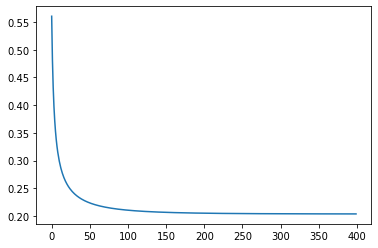

In [154]:
plt.plot(costs)

In [156]:
def feature_unscale(X):
    return X[:, 1:3] * std + mean

feature_unscale(X)

array([[85.10249633, 36.59702312],
       [85.10249633, 32.45519668],
       [85.10249633, 37.76571493],
       [85.10249633, 61.00604804],
       [85.10249633, 79.00810367],
       [85.10249633, 46.58605534],
       [85.10249633, 61.88853884],
       [85.10249633, 75.18043552],
       [85.10249633, 76.20615479],
       [85.10249633, 84.16523397],
       [85.10249633, 95.07978217],
       [85.10249633, 75.16984717],
       [85.10249633, 82.13510713],
       [85.10249633, 69.77493319],
       [85.10249633, 41.29058772],
       [85.10249633, 55.07396272],
       [85.10249633, 69.49373577],
       [85.10249633, 68.42098473],
       [85.10249633, 71.0135046 ],
       [85.10249633, 77.04656012],
       [85.10249633, 67.87201872],
       [85.10249633, 89.17326047],
       [85.10249633, 51.79229881],
       [85.10249633, 36.20394259],
       [85.10249633, 77.94933778],
       [85.10249633, 63.00050308],
       [85.10249633, 80.11347411],
       [85.10249633, 92.45621286],
       [85.10249633,

$ \theta_0 + \theta_1 x_1 + \theta_2 x_2 \geq 0 $

line is at $ \theta_0 + \theta_1 x_1 + \theta_2 x_2 = 0 $

$ \theta_2 x_2 = -(\theta_0 + \theta_1 x_1) $

$ x_2 = \frac{-(\theta_0 + \theta_1 x1)}{\theta_2} $

(array([1., 1.]),
 array([-1.5313823, -1.5313823]),
 [&lt;matplotlib.lines.Line2D at 0x7f755ed5ef70&gt;])

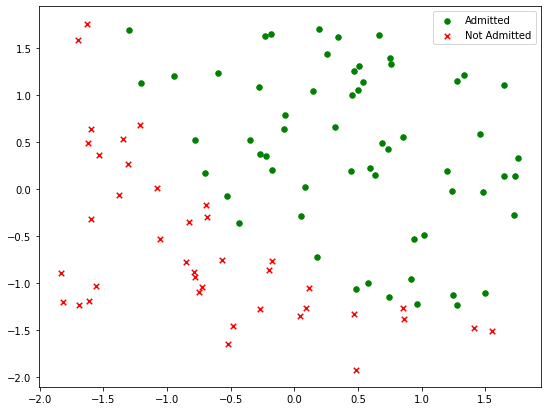

In [158]:
positive = feature_scale(positive[['Exam 1', 'Exam 2']])
x1 = positive['Exam 1']
x2 = positive['Exam 2']
plt.figure(figsize=(9, 7))
plt.scatter(x1, x2, color='green', marker='o', s=30, label='Admitted')

negative = feature_scale(negative[['Exam 1', 'Exam 2']])
x1 = negative['Exam 1']
x2 = negative['Exam 2']
plt.scatter(x1, x2, color='red', marker='x', s=30, label='Not Admitted')

plt.legend()

x1_start = np.min(X[:, 1])
x1_end = np.max(X[:, 1])

x1 = np.array([x1_start, x1_end])
x2 = -(theta[0] + theta[1] * x1) / theta[2]

x1, x2, plt.plot(x1, x2)

In [160]:
theta

array([[1.6582185 ],
       [3.88371249],
       [3.61890756]])

Predict admission for student witha  score of 45 and 85

In [162]:
scaled_input = feature_scale(np.array([[45, 85]]))
scaled_input = add_ones(scaled_input)
percentage = float(sigmoid(scaled_input @ theta) * 100)

ValueError: matmul: Input operand 1 has a mismatch in its core dimension 0, with gufunc signature (n?,k),(k,m?)-&gt;(n?,m?) (size 4 is different from 3)

In [164]:
f"{percentage:.2f}% chance that student is admitted with scores of 45 and 85"

&#39;76.76% chance that student is admitted with scores of 45 and 85&#39;

In [165]:
def predict(X, theta):
    return sigmoid(X @ theta) >= 0.5

predictions = predict(X, theta)
predictions

array([[False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [False],
       [ True],
       [ True],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [False],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [

In [166]:
np.sum(predictions == y) / X.shape[0] * 100

89.0

Since trial and error with the learning rate and iterations, and getting failed attempts with unscaled $ X $ can lead to tons of these...

![back to work](back-to-work.png)
![converge](converge.png)

We can use some built-in optimizers from SciPy to calculate the thetas for us.  Let's use an idea from this slide, such that we don't have to experiment with different $ \alpha $ values.

![optimization](optim.png)


We'll use the [Truncated Newton Conjugate (TNC) Gradient](https://docs.scipy.org/doc/scipy/reference/generated/scipy.optimize.fmin_tnc.html) optimizer from SciPy.  Reading the documentation, the easiest thing we can do is to create a function to pass to the `fprime` _"kwarg"_ that returns the derivative $ f'(\theta) $ of the cost function $f(\theta)$.

We must also **ensure** that the cost function's first parameter `x`, is the $ \theta $ matrix, so the signature must be:

```
def cost(theta, X, y, **kwargs):
    pass # return cost as FLOAT (according to docs)
```

If you listened to the advice earlier about the cost function signature, you don't need to change a thing.

To avoid confusion:
- `x` in the docs means `theta` ($ \theta $)
- `x0` ($ x_0 $) means initial $ \theta $ just like $ v_0 $ in physics means initial velocity
- the $ \theta $ required by `fmin_tnc` is a 1D Numpy array, so feel free to detect those 1D arrays and `reshape` them into 2D arrays.

```
>>> theta
array([[3],
       [4],
       [5]])
>>> theta.reshape((3, 1))
array([[3],
       [4],
       [5]])


>>> theta = np.array([3, 4, 5])
>>> theta
array([3, 4, 5])
>>> theta.reshape((3, 1))
array([[3],
       [4],
       [5]])
```

In [167]:
def gradient(theta_1d, X, y, **kwargs):
    m, n = X.shape
    regularizer = 0
    theta = theta_1d.reshape((theta_1d.size, 1))

    if lambda_ := kwargs.get('lambda_'):
        E = np.eye(X.shape[1])
        E[0][0] = 0
        regularizer = lambda_ / m * (E * theta)

    return 1/m * X.T @ (sigmoid(X @ theta) - y) + regularizer


In [168]:
import scipy.optimize as optim

# this is SciPy, not scikit-learn, no auto-adding of 1s and other voodoo
X = add_ones(data[['Exam 1', 'Exam 2']].to_numpy())
y = data[['Admitted']].to_numpy()
initial_theta = np.zeros(X.shape[1])
gradient(initial_theta, X, y)

array([[ -0.1       ],
       [-12.00921659],
       [-11.26284221]])

In [169]:
initial_theta = np.array([-24, 0.2, 0.2])
gradient(initial_theta, X, y)

array([[0.04290299],
       [2.56623412],
       [2.64679737]])

In [170]:
initial_theta = np.zeros(X.shape[1])
theta, _iters, _return_code = optim.fmin_tnc(
    func=cost, 
    x0=initial_theta, 
    fprime=gradient, 
    args=(X, y)
)
theta

array([-25.16131874,   0.20623159,   0.20147149])

In [171]:
theta = theta.reshape(theta.size, 1)
sigmoid(np.array([[1, 45, 85]]) @ theta)

array([[0.77629062]])

In [172]:
np.sum(predict(X, theta) == y) / y.size * 100

89.0

In [173]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(penalty='none')
data = pd.read_csv('admission-results.csv')
X = data[['Exam 1', 'Exam 2']]
y = data[['Admitted']]
model.fit(X, y)
model.intercept_, model.coef_

(array([-25.16138567]), array([[0.20623222, 0.20147191]]))

In [174]:
model.predict_proba(np.array([[45, 85]]))

array([[0.22370987, 0.77629013]])

In [175]:
model.classes_

array([0, 1])

In [176]:
np.sum(model.predict(X) == y.to_numpy().flatten()) / y.shape[0] * 100

89.0